# Single Layer Perceptron

### Importing Necessary Libraries

In [1]:
import numpy
import pandas
from sklearn.utils import shuffle
from matplotlib import pyplot

### Studying the data

We try to get more info on what the dataset is providing in terms of features and what classes are we supposed to predict.

In [2]:
url_to_csv = "wine.csv"

data = pandas.read_csv(url_to_csv)

In [3]:
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensitys,Hue,OD280/OD315 of diluted wines,Proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [4]:
data.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensitys,Hue,OD280/OD315 of diluted wines,Proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
data.columns.values

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensitys', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'label'], dtype=object)

In [6]:
data.iloc[:,:-1].cov(ddof=0)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensitys,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,0.655360,0.085130,0.046850,-0.836368,3.122238,0.146062,0.190954,-0.015666,0.063161,1.022506,-0.013239,0.041464,163.642650
Malic acid,0.085130,1.241004,0.049995,1.070285,-0.865888,-0.233021,-0.456054,0.040505,-0.140354,0.641215,-0.142520,-0.290805,-67.169379
Ash,0.046850,0.049995,0.074842,0.403926,1.116628,0.022021,0.031358,0.006323,0.001507,0.163729,-0.004656,0.000758,19.211201
Alcalinity of ash,-0.836368,1.070285,0.403926,11.090031,-3.952430,-0.667379,-1.165498,0.149577,-0.375057,0.144209,-0.207943,-0.652548,-460.752225
Magnesium,3.122238,-0.865888,1.116628,-3.952430,202.843328,1.905703,2.777396,-0.453004,1.921974,6.583327,0.179835,0.665548,1759.219606
Total phenols,0.146062,-0.233021,0.022021,-0.667379,1.905703,0.389489,0.537434,-0.034848,0.218141,-0.079548,0.061690,0.309274,97.619534
Flavanoids,0.190954,-0.456054,0.031358,-1.165498,2.777396,0.537434,0.992114,-0.066491,0.371051,-0.396926,0.123385,0.555126,154.574192
Nonflavanoid phenols,-0.015666,0.040505,0.006323,0.149577,-0.453004,-0.034848,-0.066491,0.015402,-0.025913,0.039895,-0.007429,-0.044219,-12.135027
Proanthocyanins,0.063161,-0.140354,0.001507,-0.375057,1.921974,0.218141,0.371051,-0.025913,0.325754,-0.033316,0.038447,0.209748,59.219759
Color intensitys,1.022506,0.641215,0.163729,0.144209,6.583327,-0.079548,-0.396926,0.039895,-0.033316,5.344256,-0.274952,-0.701847,229.471034


In [7]:
data[data.columns.values[:-1]].corr()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensitys,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensitys,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [8]:
numpy.random.seed(23)
data = data.sample(frac=1)

print(data.iloc[:, -1].value_counts())

label
2    71
1    59
3    48
Name: count, dtype: int64


### Designing a Perceptron

Notations:-
- Input Size - _m_
- Input Features - _X_
- Desired Classes - _D_
- Predicted Classes - _Y_
- Weights - _wts_ (initialized to zero)
- eta - $\eta$
- Induced Field, $\nu = \sum_0^m W^T X $
- Activation Function is *Unipolar Binary Threshold* <br/> 
$ y = \begin{cases} \text{1,} & \nu \gt 0 \\ \text{0, } & \nu \leq 0 \end{cases}$ 



In [9]:
class Perceptron:

    def __init__(self, m: int, eta: int):
        # Initializing Hyperparameters
        self.m = m
        self.eta = eta

        # Initializing weights
        self.wts = numpy.zeros(1 + self.m)

    def sigmoid_activation(self, v: numpy.number) -> numpy.number:
        return 1 / (1 + numpy.exp(-v))

    def unipolar_activation(self, v: numpy.number) -> numpy.number:
        return 1 if v >= 0 else 0

    def prepend_bias(self, x: numpy.array) -> numpy.array:
        return numpy.insert(x, 0, 1)

    def predict(self, X: numpy.array) -> numpy.array:

        # Prepending bias
        xi_bias = self.prepend_bias(X)

        # Linear Combiner
        v = self.wts.T.dot(xi_bias)
        
        # Since, there is no activation
        y = self.unipolar_activation(v)
        # y = self.sigmoid_activation(v)

        # Return y
        return y
    
    def test(self, X: numpy.ndarray, D: numpy.array) -> numpy.array:

        # Y_pred = []

        for xi in X:
            y = self.predict(xi)
            Y_pred.append(y)

        Y_pred = numpy.array(Y_pred)

        # error = D - Y_pred
        # accuracy = numpy.sum(error) / error.shape[0]
        # print(f"Accuracy: {accuracy}")

        return Y_pred

    def train(self, X: numpy.ndarray, D: numpy.ndarray):
        
        for xi, d in zip(X, D):
            
            # Prepend bias
            xi_bias = self.prepend_bias(xi)

            # Predict with existing weights
            y = self.predict(xi)

            # Error = desired - actual
            error = d - y

            # Calculating change in weights
            delta_w = self.eta * error * xi_bias

            # Updating wts
            self.wts = self.wts + delta_w

            # print(f"ep={ep}, wts = {self.wts}, error = {error}")

#### Designing a Single Layer Perceptron

A single layer perceptron is nothing but list of one or more perceptrons.

In addition to input neurons and learning rate, we also take no. of perceptrons in the layer as a parameter.

In [10]:
class SLP:

    def __init__(self, m: int, n: int, eta: int):
        self.n = n
        self.perceptrons = [Perceptron(m, eta) for _ in range(n)]

    def train(self, X: numpy.ndarray, D: numpy.ndarray, epochs: int = 1):
        for _ in range(epochs):

            X_shuff, D_shuff = shuffle(X, D, random_state=0)

            for i in range(self.n):
                self.perceptrons[i].train(X_shuff, D_shuff[:, i])
                # print(f"i={i} : Wts = {self.perceptrons[i].wts}")

    def predict(self, x: numpy.array) -> numpy.array:
        return [percep.predict(x) for percep in self.perceptrons]
    
    def test(self, X: numpy.ndarray, D: numpy.ndarray) -> numpy.array:
        Y_pred = []
        for xi, d in zip(X, D):
            y = self.predict(xi)
            Y_pred.append(y)
        return numpy.array(Y_pred)
        

#### Implementing Perceptron to the dataset

##### Encoding data using One Hot Encoding

In [11]:
desired_outputs = pandas.get_dummies(data.iloc[:, -1], dtype=int)
labels = desired_outputs.columns.values

print(f"Labels : {labels}")
print(desired_outputs)

Labels : [1 2 3]
     1  2  3
162  0  0  1
30   1  0  0
174  0  0  1
145  0  0  1
72   0  1  0
..  .. .. ..
39   1  0  0
91   0  1  0
31   1  0  0
40   1  0  0
83   0  1  0

[178 rows x 3 columns]


In [12]:
split_ratio = 0.3

input_features = data.iloc[:, :-1]

k = int(input_features.shape[0] * split_ratio)

train_x, train_y = input_features[:-k], desired_outputs[:-k]
test_x, test_y = input_features[-k:], desired_outputs[-k:]

#### Defining our Accuracy Function

We are counting all the values which are correctly classified and dividing by number of records.

Here since there are multiple perceptrons/neurons we are considering index of the highest value.

i.e.,

D = (1, 0, 0) & Y = (0, 1, 0) <br />
D_index = 0 & Y_index = 1

Hence, they don't match.

D = (0, 0, 1) & Y = (0, 0, 1) <br />
D_index = 2 & Y_index = 2

Since, they match we count this value as correctly classified.

In [13]:
def accuracy(D: numpy.ndarray, Y: numpy.ndarray):
    
    corr_pred = 0
    for d, y in zip(D, Y):
        if numpy.argmax(d) == numpy.argmax(y):
            corr_pred += 1
    
    acc = corr_pred / D.shape[0]

    return acc   

### Defining our Hyperparameters

Here we fix our hyper parameters such as $\eta$ (eta), epochs, etc.

In [14]:
ETA = 0.9
EPOCHS = 100

#### Training our SLP

In [15]:
s = SLP(train_x.shape[1], train_y.shape[1], ETA)
s.train(train_x.to_numpy(), train_y.to_numpy(), EPOCHS)

#### Testing and Metrics

In [16]:
Y_pred = s.test(test_x.to_numpy(), test_y.to_numpy())
print(accuracy(test_y.to_numpy(), Y_pred))

0.7547169811320755


#### Visualizing the data

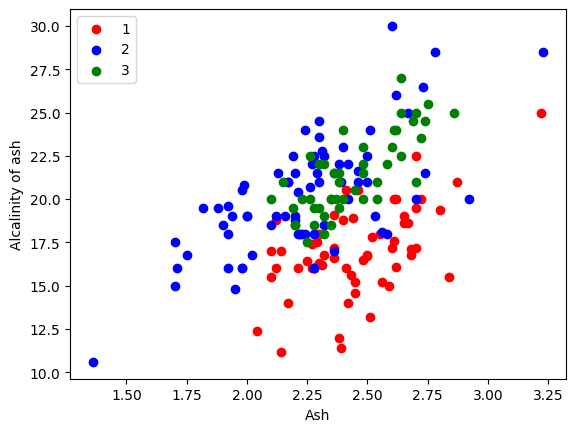

In [30]:
features = data.columns.values[:-1]
target = data.columns.values[-1]

colors = ['red', 'blue', 'green']

# For feature 1

feat_1 = features[2]
feat_2 = features[3]

for i in range(len(labels)):
    label = labels[i]
    
    d = data[data[target] == label]

    x = d[feat_1].to_numpy()
    y = d[feat_2].to_numpy()

    pyplot.scatter(x, y, c = colors[i], label = label)

pyplot.xlabel(feat_1)
pyplot.ylabel(feat_2)
pyplot.legend()
pyplot.show()